In [1]:
import numpyro.distributions as dist 

In [2]:
normal_channel = dist.Normal

In [3]:
normal_dist = normal_channel((0,1))

In [4]:
dist.Delta(v=(5.0, 5.0, 5.0), event_dim=1)


<numpyro.distributions.distribution.Delta object at 0x1449205c0 with batch shape () and event shape (3,)>

In [5]:
from dataclasses import dataclass, field
from typing import Optional
from discopy.cat import Category
from discopy.markov import Ty, Box
import numpyro.distributions as dist  # NumPyro's distributions
from functools import partial

# Define some basic types.
R = Ty("R")
N = Ty("N")

# Extend Box to include a probabilistic distribution.
from discopy.markov import Ty
import numpyro.distributions as dist

# Define domain and codomain types
dom = Ty('A')
cod = Ty('B')

# Define the distribution
from discopy.markov import Ty, Box
import numpyro.distributions as dist
from dataclasses import dataclass
from typing import Optional

@dataclass
class ProbBox(Box):
    distribution: Optional[dist.Distribution] = None

    def __init__(self, name: str, dom: Ty, cod: Ty, distribution: Optional[dist.Distribution] = None):
        super().__init__(name, dom, cod)  # Call Box's constructor
        self.distribution = distribution  # Set the distribution attribute

# Define domain and codomain types
dom = Ty('A')
cod = Ty('A')

# Define the distribution
distribution = dist.Normal(0, 1)

# Initialize the ProbBox
prob_box = ProbBox(name='my_prob_box', dom=dom, cod=cod, distribution=distribution)


In [6]:
from functools import partial

In [7]:
from functools import partial
import numpyro.distributions as dist

normal_channel = dist.Normal
# Define a function that takes positional arguments (e.g. loc, scale)
log_prob = lambda *params: normal_channel(*params).log_prob

# Now, log_prob(0, 1) returns a function that takes one argument (the value to evaluate)
print(log_prob(0, 1)(3))  # computes log_prob(3) for Normal(0, 1)


-5.4189386


In [8]:
from functools import partial
import numpyro.distributions as dist

normal_channel = dist.Normal
# Correct lambda: note that x and y are passed as separate arguments.
log_prob = partial(lambda x: normal_channel(*x).log_prob)

# This creates a function log_prob(0,1) that returns a function taking one argument.
print(log_prob(0, 1)(3))  # now works: computes log_prob(3) for Normal(0,1)


TypeError: <lambda>() takes 1 positional argument but 2 were given

In [ ]:
f1 = partial(lambda x: normal_channel(*x).log_prob)
f2 = partial(lambda x: normal_channel(*x).log_prob)

In [ ]:
def channelize_log_prob(dist):
    return lambda *x: partial(dist(*x).log_prob)

channelize_log_prob(normal_channel)(0, 1)(3)  # computes log_prob(3) for Normal(0, 1)

Array(-5.4189386, dtype=float32, weak_type=True)

TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [ ]:
new = (prob_box >> prob_box)

In [ ]:
new.distribution

AttributeError: 'Diagram' object has no attribute 'distribution'

In [ ]:
from discopy.markov import Ty
import numpyro.distributions as dist

# Define domain and codomain types
dom = Ty('A')
cod = Ty('B')

# Define the distribution
distribution = dist.Normal(0, 1)

# Initialize the ProbBox
prob_box = ProbBox(name='my_prob_box', dom=dom, cod=cod, distribution=distribution)


NameError: name 'ProbBox' is not defined

1 R R
1
2


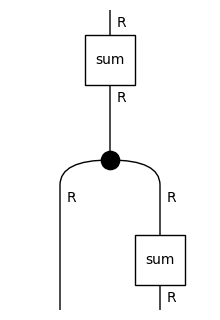

In [10]:

from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)
chaining_sums.log_prob_channel(1)(1,2)
# chaining_sums = chaining_sums >> sum_model
chaining_sums.symbolic_channel.draw()
# print(chaining_sums.log_prob_channel(1)(1,2,3))

In [11]:
from discopy.markov import *
import numpyro.distributions as dist 
x, y = Ty('x'), Ty('y')
f = Box('f', x @ x, y)

@Diagram.from_callable(x @ x, y)
def diagram(a, b):  # Take two wires as inputs
    _ = dist.Delta(b)     # Swap, apply f and discard the result.
    return f(a, b) 

In [12]:
diagram[0]

markov.Diagram(inside=(monoidal.Layer(monoidal.Ty(), markov.Box('f', monoidal.Ty(cat.Ob('x'), cat.Ob('x')), monoidal.Ty(cat.Ob('y'))), monoidal.Ty()),), dom=monoidal.Ty(cat.Ob('x'), cat.Ob('x')), cod=monoidal.Ty(cat.Ob('y')))

In [13]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x172071800>)

1.0


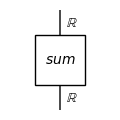

In [17]:
from discopy.traced import Ty, Box, Category, Functor
from discopy import python



R = Ty('R')
sum = Box('sum', R, R)
copy = Box('', x, x @ x, draw_as_spider=True, color="black")

x = Ty('$\\mathbb{R}$')
f = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={f: lambda x=1.: x},
    cod=Category(python.Ty, python.Function))




phi = f




print(F(phi)(1.0))                   

phi.draw()

In [18]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x172071800>)

In [19]:
sum_model.log_prob_channel(1)

TypeError: the first argument must be callable

In [ ]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')))

In [ ]:
copy_arrow

markov.Copy(monoidal.Ty(cat.Ob('R')), 2)

In [20]:
from discopy.traced import Ty, Box, Category, Functor
from discopy.markov import Ty as M_Ty, Copy
from discopy import python
from stat_games.open_model import OpenModel
from functools import partial

# Define a simple sum function that prints its second argument and returns the sum.
def sum_func(x, y):
    print("sum_func received:", y)
    return x + y

# Define a channelized version that partially applies x.
channelized_sum = lambda x: partial(sum_func, x)

# Create a basic type.
R = Ty('R')

# Create an OpenModel with domain R and codomain R.
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model  # Compose models.
print("Direct call to sum_model.log_prob_channel(1):", sum_model.log_prob_channel(1))

# Prepare functor mapping.
x = Ty('R')
sum_box = sum_model.box_channel   # This is the Box corresponding to our sum channel.
sum_function = sum_model.log_prob_channel

# Create a Copy arrow that duplicates its input twice.
copy_arrow = Copy(x, 2)

# Helper: Given n, return a function that, given x, returns an n-tuple of x.
def copy_n(n: int):
    return lambda x: (x,) * n

# Subclass Functor to automatically handle Copy arrows.
class MyFunctor(Functor):
    def on_arrow(self, arrow):
        # If the arrow is a Copy, then map it to a function that duplicates its input n times.
        if isinstance(arrow, Copy):
            return copy_n(len(arrow.cod))
        # Otherwise, if the arrow is explicitly defined, use that.
        if arrow in self.ar:
            return self.ar[arrow]
        return super().on_arrow(arrow)

# Create our functor mapping objects to Python types.
# Note: even though we add an entry for Copy(x,2), our subclass will catch it automatically.
F = MyFunctor(
    ob={x: (float,)},
    ar={
        sum_box: sum_function,
        copy_arrow: copy_n(len(copy_arrow.cod))  # This is optional, as MyFunctor handles Copy arrows.
    },
    cod=Category(python.Ty, python.Function)
)

phi = sum_box

# For debugging, print an internal representation of the arrow.
print("sum_box.inside:", sum_box.inside)
# Now apply the functor to phi (which is our sum_box) and call the resulting function on 1.0.
# If phi were a Copy arrow, it would now produce a 2-tuple of 1.0.
print("F(phi)(1.0):", F(phi)(1.0))


1 R R
Direct call to sum_model.log_prob_channel(1): functools.partial(<function sum_func at 0x30a8d7060>, 1)
sum_box.inside: (monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x30a8d7a60>), monoidal.Ty()),)
F(phi)(1.0): functools.partial(<function sum_func at 0x30a8d7060>, 1.0)


# Mention to Toby

In [27]:

from discopy.markov import Ty as M_Ty  # if needed
from discopy import python
from stat_games.open_model import OpenModel
from functools import partial

# Define a simple sum function that prints its second argument and returns the sum.
def sum_func(x, y):
    print("sum_func received:", y)
    return x + y

# Define a channelized version that partially applies x.
channelized_sum = lambda x: partial(sum_func, x)

# Create a basic type.
R = Ty('R')

# Create an OpenModel with domain R and codomain R.
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model  # Compose models.
print("Direct call to sum_model.log_prob_channel(1):", sum_model.log_prob_channel(1))

# Prepare functor mapping.
x = Ty('R')
sum_box = sum_model.box_channel   # The Box corresponding to our sum channel.
sum_function = sum_model.log_prob_channel

# Define a helper: given an integer n, return a function that, given x, returns an n-tuple of x.
def copy_n(n: int):
    return lambda x: (x,) * n

# Subclass Functor to automatically handle Copy arrows.
class MyFunctor(Functor):
    def on_arrow(self, arrow):
        # If arrow is a Copy, then map it to a function that duplicates its input n times,
        # where n is determined by the number of factors in the codomain.
        if isinstance(arrow, Copy):
            return copy_n(len(arrow.cod))
        # Otherwise, if arrow is explicitly given in our dictionary, use that.
        if arrow in self.ar:
            return self.ar[arrow]
        return super().on_arrow(arrow)

# Create our functor mapping objects to Python types.
# We no longer add any entry for Copy arrows here.
F = MyFunctor(
    ob={x: (float,)},
    
    ar=lambda f: f.data if getattr(f, "data", None) is not None else f
    ,
    cod=Category(python.Ty, python.Function)
)

phi = sum_box

# For debugging, print an internal representation of the arrow.
print("sum_box.inside:", sum_box.inside)
# Now, applying the functor to phi, if phi were a Copy arrow then it would now be handled automatically.
print("F(phi)(1.0):", F(phi)(1.0))


1 R R
Direct call to sum_model.log_prob_channel(1): functools.partial(<function sum_func at 0x30b172de0>, 1)
sum_box.inside: (monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x30b173ba0>), monoidal.Ty()),)
F(phi)(1.0): functools.partial(<function sum_func at 0x30b172de0>, 1.0)


1 R R
(monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x30a8d6840>), monoidal.Ty()),)
functools.partial(<function sum at 0x30a8d68e0>, 1.0)
1 R R


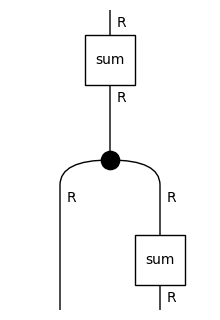

None


KeyError: markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x30a8d68e0>)

In [25]:
from discopy.traced import Ty, Box, Category, Functor
from discopy import python
from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)

x = Ty('R')
sum_box = sum_model.box_channel
sum_function = sum_model.log_prob_channel
copy = Box('', x, x @ x, draw_as_spider=True, color="black")

# x = Ty('$\\mathbb{R}$')
# sum = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={sum_box: sum_function},
    cod=Category(python.Ty, python.Function))




phi = sum_box



print(sum_box.inside)
print(F(phi)(1.0))  

from discopy.markov import Ty, Box, Category, Functor, Copy
from discopy.monoidal import Box
from discopy import python
from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)

x = Ty('R')
sum_box_chained = chaining_sums.box_channel
sum_function_chained = chaining_sums.log_prob_channel
# copy = Box('', x, x @ x, draw_as_spider=True, color="black")

# x = Ty('$\\mathbb{R}$')
# sum = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={sum_box: sum_function,
        Copy(x, 2): lambda x: (x,x)},
    cod=Category(python.Ty, python.Function))




phi = sum_box_chained



print(sum_box_chained.draw())
print(F(phi)(1.0))  

In [ ]:
from discopy.markov import Ty, Box, Category, Functor, Copy
from discopy.monoidal import Box
from discopy import python
from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)

x = Ty('R')
sum_box_chained = chaining_sums.box_channel
sum_function_chained = chaining_sums.log_prob_channel
# copy = Box('', x, x @ x, draw_as_spider=True, color="black")

# x = Ty('$\\mathbb{R}$')
# sum = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={sum_box: sum_function,
        Copy(x, 2): lambda x: (x,x)},
    cod=Category(python.Ty, python.Function))




phi = sum_box_chained



print(sum_box_chained.draw())
print(F(phi)(1.0))  

1 R R


NameError: name 'n' is not defined

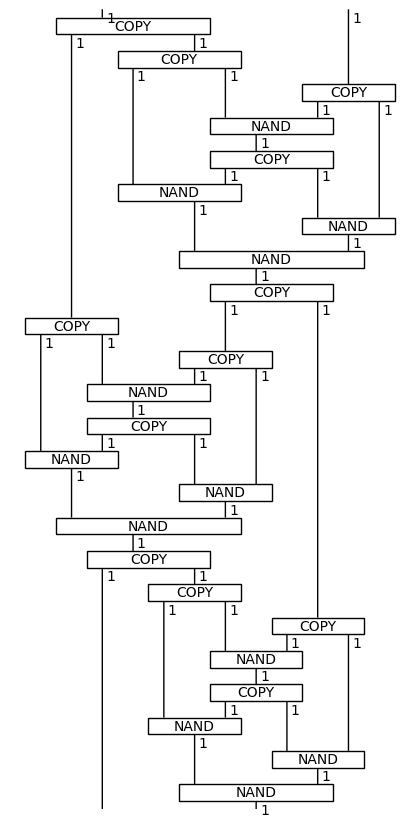

In [ ]:
from discopy import monoidal, python
from discopy.cat import factory, Category

@factory  # Ensure that composition of circuits remains a circuit.
class Circuit(monoidal.Diagram):
    ty_factory = monoidal.PRO  # Use natural numbers as objects.

    def __call__(self, *bits):
        F = monoidal.Functor(
            ob=lambda _: bool, ar=lambda f: f.data,
            cod=Category(python.Ty, python.Function))
        return F(self)(*bits)

class Gate(monoidal.Box, Circuit):
    """A gate is just a box in a circuit with a function as data."""

NAND = Gate("NAND", 2, 1, data=lambda x, y: not (x and y))
COPY = Gate("COPY", 1, 2, data=lambda x: (x, x))

XOR = COPY @ COPY >> 1 @ (NAND >> COPY) @ 1 >> NAND @ NAND >> NAND
CNOT = COPY @ 1 >> 1 @ XOR
NOTC = 1 @ COPY >> XOR @ 1
SWAP = CNOT >> NOTC >> CNOT  # Exercise: Find a cheaper SWAP circuit!

assert all(SWAP(x, y) == (y, x) for x in [True, False]
                                for y in [True, False])

SWAP.draw(figsize=(4, 8), wire_labels=False)

In [ ]:
?Box

Init signature: Box(name: 'str', dom: 'Ty', cod: 'Ty', **params)
Docstring:     
A box is a diagram with a :code:`name` and the layer of just itself inside.

Parameters:
    name : The name of the box.
    dom : The domain of the box, i.e. the input.
    cod : The codomain of the box, i.e. the output.
    data (any) : Extra data in the box, default is :code:`None`.
    is_dagger (bool, optional) : Whether the box is dagger.

Other parameters
----------------

draw_as_spider : bool, optional
    Whether to draw the box as a spider.
draw_as_wires : bool, optional
    Whether to draw the box as wires, e.g. :class:`discopy.symmetric.Swap`.
draw_as_braid : bool, optional
    Whether to draw the box as a a braid, e.g. :class:`braided.Braid`.
drawing_name : str, optional
    The name to use when drawing the box.
tikzstyle_name : str, optional
    The name of the style when tikzing the box.
color : str, optional
    The color to use when drawing the box, one of
    :code:`"white", "red", "gree

In [24]:
from discopy.monoidal import Diagram, PRO, Functor
from discopy.cat import Category
from discopy import python

# Define a new Circuit class as a monoidal diagram.
class Circuit(Diagram):
    # Use natural numbers as objects.
    ty_factory = PRO

    def __call__(self, *bits):
        # Create a functor mapping objects to bool and arrows to functions.
        # For each arrow f, if f.data is not None, use it; otherwise, return f.
        F = Functor(
            ob=lambda _: bool,
            ar=lambda f: f.data if getattr(f, "data", None) is not None else f,
            cod=Category(python.Ty, python.Function)
        )
        # Apply the functor to self and then call the resulting function on *bits.
        return F(self)(*bits)

# ---------------------------
# For demonstration, we re-use your existing definitions.

# from discopy.traced import Ty, Box, Category, Functor as TracedFunctor, Copy
from discopy.markov import Ty as M_Ty
from stat_games.open_model import OpenModel
from functools import partial

def sum_func(x, y):
    print("sum_func received:", y)
    return x + y

channelized_sum = lambda x: partial(sum_func, x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
print("Direct call to sum_model.log_prob_channel(1):", sum_model.log_prob_channel(1))

x = Ty('R')
sum_box = sum_model.box_channel
sum_function = sum_model.log_prob_channel
# Create a Copy arrow (here with 2 copies) using the traced version.
copy_arrow = Copy(x, 2)

# Helper: function that returns a function duplicating its input n times.
def copy_n(n: int):
    return lambda x: (x,) * n

# Our generic functor that automatically handles Copy arrows.
class MyFunctor(TracedFunctor):
    def on_arrow(self, arrow):
        if isinstance(arrow, Copy):
            return copy_n(len(arrow.cod))  # len(arrow.cod) gives the number of copies.
        if arrow in self.ar:
            return self.ar[arrow]
        return super().on_arrow(arrow)

# Create our functor mapping.
F = MyFunctor(
    ob={x: (float,)},
    ar={sum_box: sum_function},  # No need to manually add Copy arrows.
    cod=Category(python.Ty, python.Function)
)

phi = sum_box
print("sum_box.inside:", sum_box.inside)
print("F(phi)(1.0):", F(phi)(1.0))

# Now, demonstrate the Circuit class.
# For instance, suppose we have a diagram (here, we reuse sum_box as a simple arrow).
circ = Circuit(sum_box)  # Create a Circuit with sum_box.
# When we call circ(1.0), the functor inside __call__ will look for f.data.
# If sum_box has no data, it will simply return sum_box.
print("Circuit output:", circ(1.0))


1 R R
Direct call to sum_model.log_prob_channel(1): functools.partial(<function sum_func at 0x171eb9620>, 1)
sum_box.inside: (monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')), data=<function <lambda> at 0x30a8d6340>), monoidal.Ty()),)
F(phi)(1.0): functools.partial(<function sum_func at 0x171eb9620>, 1.0)


TypeError: Diagram.__init__() missing 2 required positional arguments: 'dom' and 'cod'